In [3]:
import numpy as np

In [2]:
class Momentum:

    """Momentum SGD"""

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

In [3]:
mon = Momentum()

In [4]:
x = -7
y = 2

z = 1/20*x**2 + y**2

In [5]:
params = {"x":-7, "y":2}
momentum=0.9
lr = 0.01

x_list = []
y_list = []
for _ in range(2):
    if v == None:
        v = {}
        for key, val in params.items():
            v[key] = np.zeros_like(val)

    for key in params.keys():
        grads = gradient(params)
        # v[key] = momentum*v[key] - lr*grads[key] 
        v[key] = -lr*grads[key] 
        params[key] += v[key]
        
        if key == 'x':
            x_list.append(params[key])
        else:
            y_list.append(params[key])

NameError: name 'v' is not defined

In [10]:
def gradient(param):
    grads = {}
    # backward
    for idx, (key, value) in enumerate(params.items()):
        dz = 1
        
        if idx == 0:
            grads[key] = round(1/10*value, 2)
        else:
            grads[key] = round(2*value, 2)
            
    return grads

In [11]:
params = {"x":-7, "y":2}
v = {}
for key, val in params.items():
    v[key] = np.zeros_like(val)

## 他の人の参考

### https://www.anarchive-beta.com/entry/2020/08/10/180000

In [12]:
# この項で利用するライブラリを読み込む
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Momentumの実装
class Momentum:
    
    # インスタンス変数を定義
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr # 学習率
        self.momentum = momentum # vの調整項
        self.v = None # 速度
    
    # パラメータの更新メソッドを定義
    def update(self, params, grads):
        # vを初期化
        if self.v is None: # 初回のみ
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val) # 全ての要素が0
        
        # パラメータごとに値を更新
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key] # 式(6.3)
            params[key] += self.v[key] # 式(6.4)
            
# 上記は本と同じ


In [14]:
# 式(6.2)
def f(x, y):
    return x ** 2 / 20.0 + y ** 2

# 式(6.2)の勾配(偏微分)
def df(x, y):
    # 偏微分
    dx = x / 10.0 # df / dx
    dy = 2.0 * y # df / dy
    return dx, dy # (値を2つ出力！)

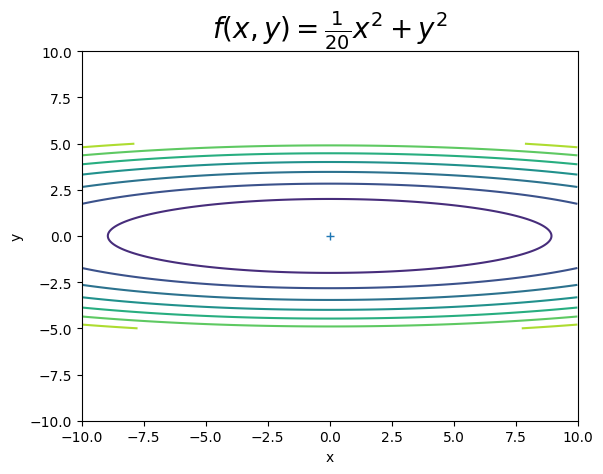

In [15]:
# 等高線用の値
x = np.arange(-10, 10, 0.01) # x軸の値
y = np.arange(-5, 5, 0.01) # y軸の値
X, Y = np.meshgrid(x, y) # 格子状の点に変換
Z = f(X, Y)

# 作図
plt.contour(X, Y, Z) # 等高線
plt.plot(0, 0, '+') # 最小値の点
plt.xlim(-10, 10) # x軸の範囲
plt.ylim(-10, 10) # y軸の範囲
plt.xlabel("x") # x軸ラベル
plt.ylabel("y") # y軸ラベル
plt.title("$f(x, y) = \\frac{1}{20} x^2 + y^2$", fontsize=20) # タイトル
plt.show()

In [16]:
# パラメータの初期値を指定
params = {}
params['x'] = -7.0
params['y'] = 2.0

# 勾配の初期値を指定
grads = {}
grads['x'] = 0
grads['y'] = 0

# 学習率を指定
lr = 0.1

# モーメンタムを指定
momentum = 0.9

# インスタンスを作成
optimizer = Momentum(lr=lr, momentum=momentum)

In [17]:
# 試行回数を指定
iter_num = 30

# 更新値の記録用リストを初期化
x_history = []
y_history = []

# 初期値を保存
x_history.append(params['x'])
y_history.append(params['y'])

# 関数の最小値を探索
for _ in range(iter_num):
    
    # 勾配を計算
    grads['x'], grads['y'] = df(params['x'], params['y'])
    
    # パラメータを更新
    optimizer.update(params, grads)
    
    # パラメータを記録
    x_history.append(params['x'])
    y_history.append(params['y'])

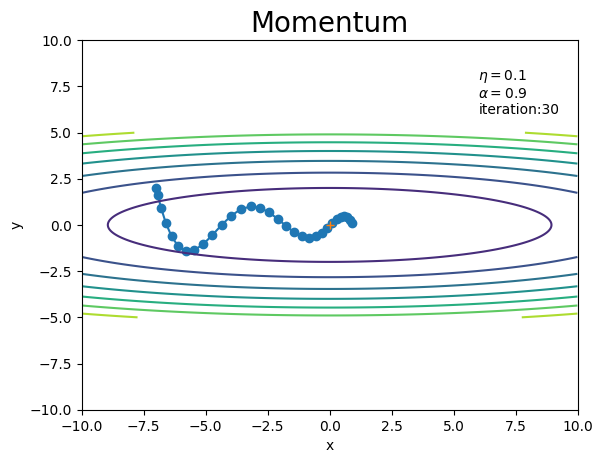

In [18]:
# 作図
plt.plot(x_history, y_history, 'o-') # パラメータの推移
plt.contour(X, Y, Z) # 等高線
plt.plot(0, 0, '+') # 最小値の点
plt.xlim(-10, 10) # x軸の範囲
plt.ylim(-10, 10) # y軸の範囲
plt.xlabel("x") # x軸ラベル
plt.ylabel("y") # y軸ラベル
plt.title("Momentum", fontsize=20) # タイトル
plt.text(6, 6, "$\\eta=$" + str(lr) + "\n$\\alpha=$" + str(momentum) + "\niteration:" + str(iter_num)) # メモ
plt.show()

ゼロつくではSGDでは学習率0.95でmomentumでは学習率を0.01で行っているにもかかわらず、
同じ条件で実施している程で話しているから、違和感がある。
SGDではX軸にほぼ平坦であるので、すぐにy＝０で落ち着いてしまう。このため。momentumが良い仕事をしているのではと思う。

## adamの実装

In [19]:
# 式(6.2)
def f(x, y):
    return x ** 2 / 20.0 + y ** 2

# 式(6.2)の勾配(偏微分)
def df(x, y):
    # 偏微分
    dx = x / 10.0 # df / dx
    dy = 2.0 * y # df / dy
    return dx, dy # (値を2つ出力！)

In [20]:
from common.optimizer import Adam

# パラメータの初期値を指定
params = {}
params['x'] = -7.0
params['y'] = 2.0

# 勾配の初期値を指定
grads = {}
grads['x'] = 0
grads['y'] = 0

# beta1, beta2と学習率の設定
lr = 0.3
beta1 = 0.9
beta2 = 0.99


# インスタンスを作成
optimizer = Adam(lr=lr, beta1=beta1, beta2=beta2)

In [21]:
# 試行回数を指定
iter_num = 30

# 更新値の記録用リストを初期化
x_history = []
y_history = []

# 初期値を保存
x_history.append(params['x'])
y_history.append(params['y'])

# 関数の最小値を探索
for _ in range(iter_num):
    
    # 勾配を計算
    grads['x'], grads['y'] = df(params['x'], params['y'])
    
    # パラメータを更新
    optimizer.update(params, grads)
    
    # パラメータを記録
    x_history.append(params['x'])
    y_history.append(params['y'])

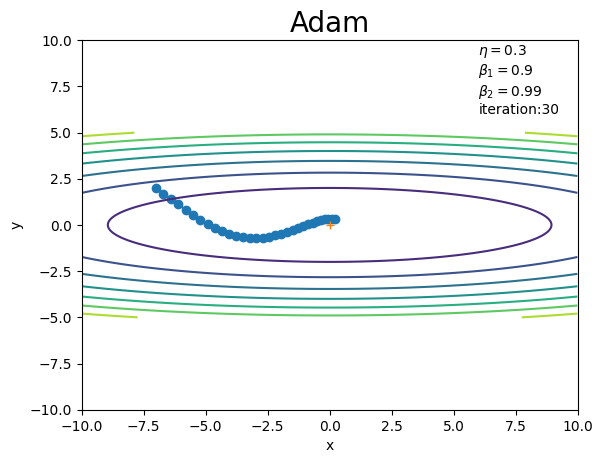

In [22]:
# 作図
# 等高線用の値
x = np.arange(-10, 10, 0.01) # x軸の値
y = np.arange(-5, 5, 0.01) # y軸の値
X, Y = np.meshgrid(x, y) # 格子状の点に変換
Z = f(X, Y)

plt.plot(x_history, y_history, 'o-') # パラメータの推移
plt.contour(X, Y, Z) # 等高線
plt.plot(0, 0, '+') # 最小値の点
plt.xlim(-10, 10) # x軸の範囲
plt.ylim(-10, 10) # y軸の範囲
plt.xlabel("x") # x軸ラベル
plt.ylabel("y") # y軸ラベル
plt.title("Adam", fontsize=20) # タイトル
plt.text(6, 6, "$\\eta=$" + str(lr) + "\n$\\beta_1=$" + str(beta1) + "\n$\\beta_2=$" + str(beta2) + "\niteration:" + str(iter_num)) # メモ
plt.show()

## 隠れ層のアクティベーション分布

In [23]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# N(1000, 100)のデータ
x = np.random.randn(1000, 100)

# 隠れ層のノードの数
node_num = 100 

# 隠れ層の数
hidden_layer_size = 5

# アクティベーション格納リスト
activations = {}

#　順伝播
weight_scale = 1 
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) * weight_scale
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a
    

In [24]:
activations[0][0]

array([9.77729038e-01, 9.98730320e-01, 2.44610962e-05, 1.38126100e-02,
       4.06476412e-09, 4.05796395e-01, 9.99933328e-01, 9.98287823e-01,
       6.56198654e-07, 9.98684493e-01, 9.99373568e-01, 9.99999954e-01,
       2.64654403e-01, 1.05846359e-05, 6.16065260e-02, 2.11034426e-06,
       1.35373667e-04, 7.06411844e-01, 9.86454878e-01, 6.57527423e-04,
       4.11702856e-01, 5.59985220e-07, 6.72441714e-04, 5.90575669e-03,
       2.90228070e-03, 9.99993856e-01, 8.10803044e-08, 1.95354244e-01,
       1.10255646e-01, 1.07602449e-04, 9.43334746e-01, 2.88350034e-03,
       9.87139614e-01, 3.61210413e-04, 8.56902566e-03, 7.32491509e-04,
       4.70566889e-01, 9.99773378e-01, 7.94782277e-01, 8.50539295e-05,
       9.97236203e-01, 3.47949645e-01, 5.39766983e-04, 1.84444425e-01,
       9.64400707e-01, 9.02833196e-01, 9.99859132e-01, 8.98569733e-01,
       9.86762828e-07, 9.99993516e-01, 1.72087300e-02, 1.38853030e-02,
       9.99808758e-01, 8.44946937e-01, 3.91154984e-03, 1.15358531e-01,
      

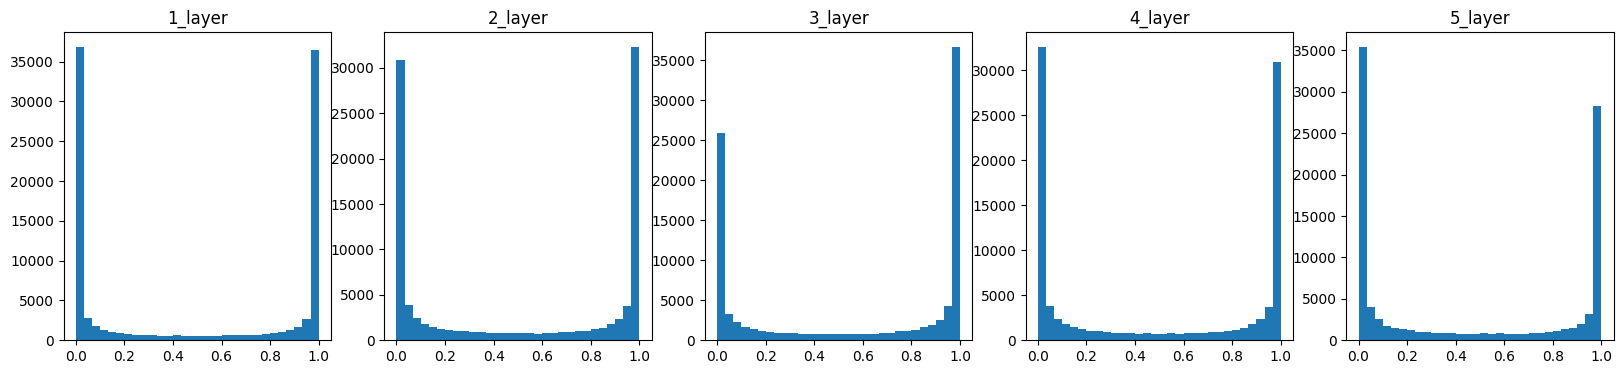

In [25]:
# ヒストグラムの描写
plt.figure(figsize=(20, 4))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}_layer")
    plt.hist(a.flatten(), 30, range=(0,1))

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# N(1000, 100)のデータ
x = np.random.randn(1000, 100)

# 隠れ層のノードの数
node_num = 100 

# 隠れ層の数
hidden_layer_size = 5

# アクティベーション格納リスト
activations = {}


weight_scale = 0.01
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) * weight_scale
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a

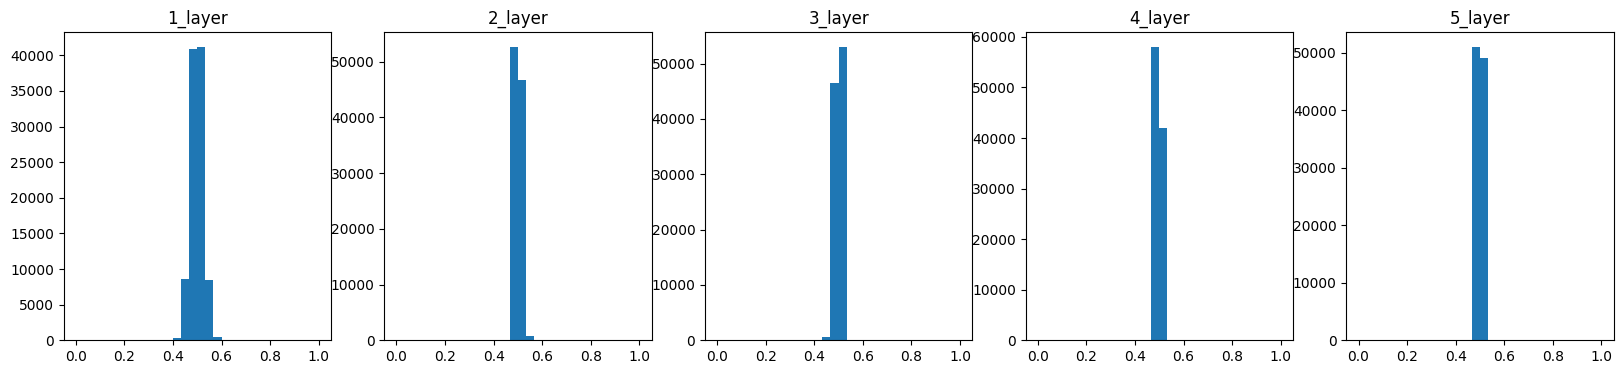

In [27]:
# ヒストグラムの描写
plt.figure(figsize=(20, 4))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}_layer")
    plt.hist(a.flatten(), 30, range=(0,1))

In [28]:
dot_list = []
sig_list = []

for _ in range(100):
    x = np.random.randn(1000)
    y = np.random.randn(1000)
    dot_x = np.dot(x.T, y) 
    sig_x = sigmoid(dot_x)
    dot_list.append(dot_x)
    sig_list.append(sig_x)

(array([  6.,  15.,  66., 155., 239., 252., 154.,  84.,  23.,   6.]),
 array([-3.20592344, -2.5736648 , -1.94140616, -1.30914752, -0.67688889,
        -0.04463025,  0.58762839,  1.21988703,  1.85214567,  2.48440431,
         3.11666295]),
 <BarContainer object of 10 artists>)

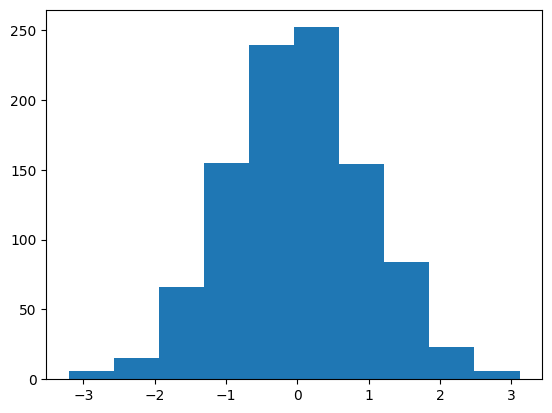

In [29]:
# 標準正規分布に従ってサンプリングされている
plt.hist(x)

(array([ 4.,  8., 13., 13., 14., 14., 11.,  8.,  8.,  7.]),
 array([-67.64038819, -53.33527172, -39.03015525, -24.72503878,
        -10.41992231,   3.88519416,  18.19031063,  32.4954271 ,
         46.80054357,  61.10566004,  75.41077651]),
 <BarContainer object of 10 artists>)

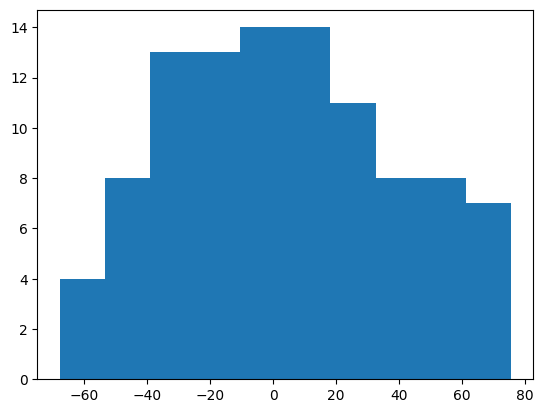

In [30]:
# 正規分布の掛け算でどう分布するか
plt.hist(dot_list)

(array([44.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  2., 50.]),
 array([4.20874541e-30, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

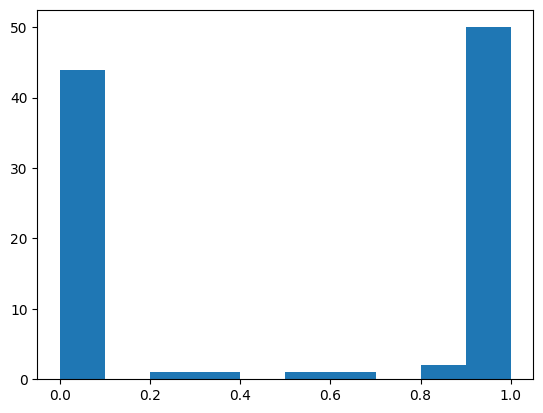

In [31]:
plt.hist(sig_list)

内積は積和なので+と-に大きくなるので,sigmoidで二極化する

In [32]:
# スケールを0.01にした場合
dot_list = []
sig_list = []

for _ in range(100):
    x = np.random.randn(1000)*0.01
    y = np.random.randn(1000)
    dot_x = np.dot(x.T, y) 
    sig_x = sigmoid(dot_x)
    dot_list.append(dot_x)
    sig_list.append(sig_x)

(array([  3.,  44., 121., 236., 249., 196., 100.,  41.,   8.,   2.]),
 array([-0.02999485, -0.02335276, -0.01671067, -0.01006858, -0.00342649,
         0.0032156 ,  0.00985769,  0.01649978,  0.02314187,  0.02978395,
         0.03642604]),
 <BarContainer object of 10 artists>)

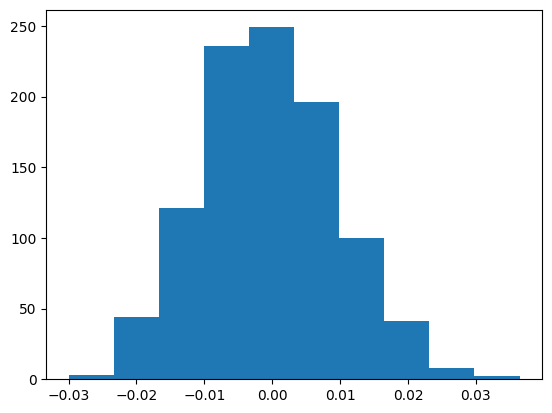

In [33]:
plt.hist(x)

(array([ 2.,  4., 10., 18., 18., 21., 12., 11.,  3.,  1.]),
 array([-0.68420857, -0.53497069, -0.38573281, -0.23649493, -0.08725705,
         0.06198083,  0.21121871,  0.36045659,  0.50969447,  0.65893235,
         0.80817024]),
 <BarContainer object of 10 artists>)

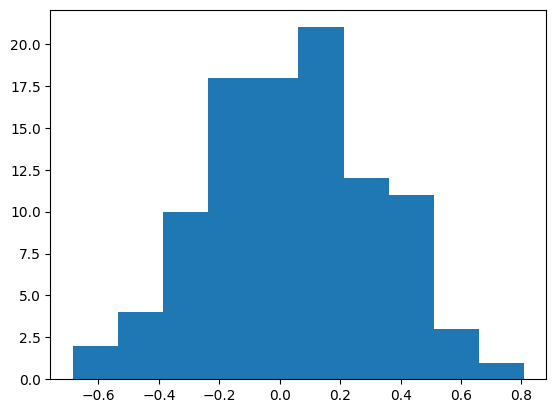

In [34]:
plt.hist(dot_list)

(array([ 0.,  0.,  0.,  6., 40., 43., 11.,  0.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

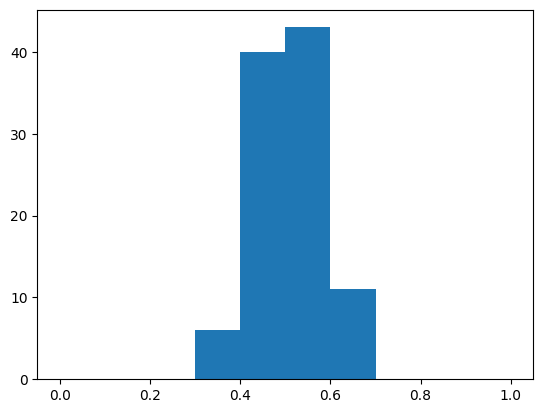

In [35]:
plt.hist(sig_list, range=(0,1))

xがN(0, 0.01)の分布で-0.03　~　0.01のかなり低い値を取るため、内積で-0.5　~　0.5の値を取るのがほどんどで、sigmoidで0.2~0.7に局所化する

## Xavierの初期値

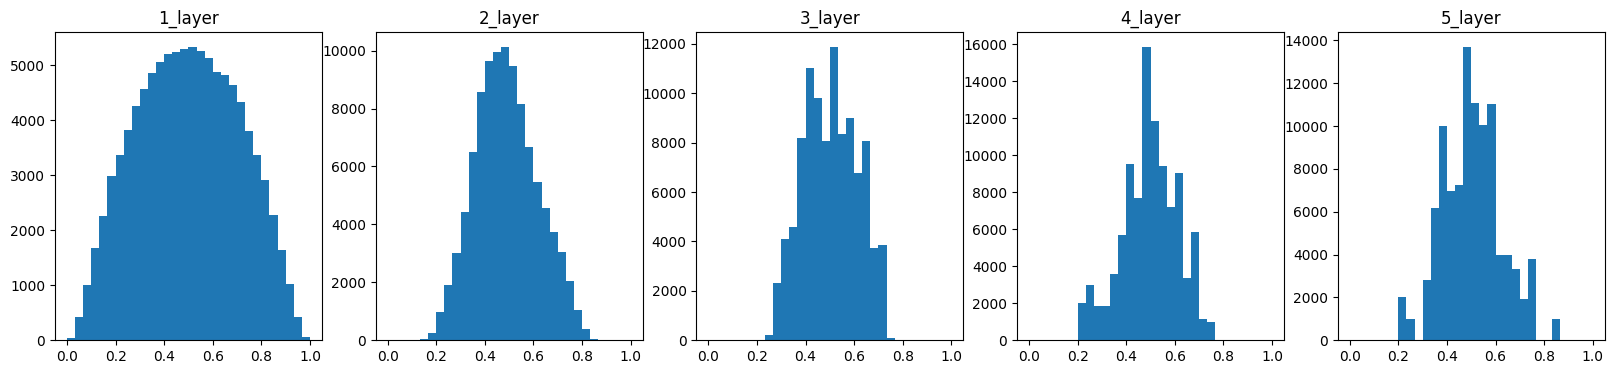

In [36]:
# N(1000, 100)のデータ
x = np.random.randn(1000, 100)

# 隠れ層のノードの数
node_num = 100 

# 隠れ層の数
hidden_layer_size = 5

# アクティベーション格納リスト
activations = {}

#　順伝播
weight_scale = 1 
for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]
        
    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    
    z = np.dot(x, w)
    a = sigmoid(z)
    activations[i] = a
    
# ヒストグラムの描写
plt.figure(figsize=(20, 4))
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(f"{i+1}_layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    

In [37]:
# 100の入力で1の出力を1000回繰り返した場合 => 1のノードのアクティベーション分布
dot_list = []
sig_list = []

for _ in range(1000):
    x = np.random.randn(1000) / np.sqrt(1000)
    y = np.random.randn(1000)
    dot_x = np.dot(x.T, y) 
    sig_x = sigmoid(dot_x)
    dot_list.append(dot_x)
    sig_list.append(sig_x)

(array([ 60.,  78., 124., 127., 145., 148., 115.,  99.,  80.,  24.]),
 array([0.08072352, 0.1682135 , 0.25570349, 0.34319347, 0.43068345,
        0.51817343, 0.60566342, 0.6931534 , 0.78064338, 0.86813337,
        0.95562335]),
 <BarContainer object of 10 artists>)

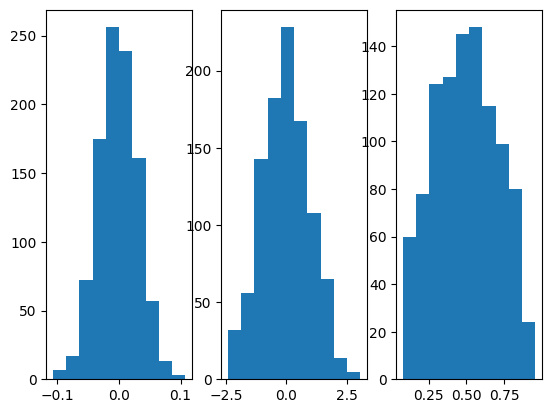

In [38]:
plt.subplot(1, 3, 1)
plt.hist(x)
plt.subplot(1, 3, 2)
plt.hist(dot_list)
plt.subplot(1, 3, 3)
plt.hist(sig_list)

## 過学習

In [43]:
from hidden_others.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

epoch:0, train acc:0.11, test acc:0.1163
epoch:1, train acc:0.13333333333333333, test acc:0.1234
epoch:2, train acc:0.16, test acc:0.1384
epoch:3, train acc:0.17333333333333334, test acc:0.16
epoch:4, train acc:0.23, test acc:0.181
epoch:5, train acc:0.25666666666666665, test acc:0.2047
epoch:6, train acc:0.2966666666666667, test acc:0.2325
epoch:7, train acc:0.34, test acc:0.2664
epoch:8, train acc:0.38, test acc:0.2866
epoch:9, train acc:0.3933333333333333, test acc:0.3181
epoch:10, train acc:0.41, test acc:0.3402
epoch:11, train acc:0.43666666666666665, test acc:0.3539
epoch:12, train acc:0.4633333333333333, test acc:0.3682
epoch:13, train acc:0.4766666666666667, test acc:0.387
epoch:14, train acc:0.49333333333333335, test acc:0.4028
epoch:15, train acc:0.5033333333333333, test acc:0.4121
epoch:16, train acc:0.5266666666666666, test acc:0.4252
epoch:17, train acc:0.54, test acc:0.436
epoch:18, train acc:0.5733333333333334, test acc:0.4498
epoch:19, train acc:0.5766666666666667, test

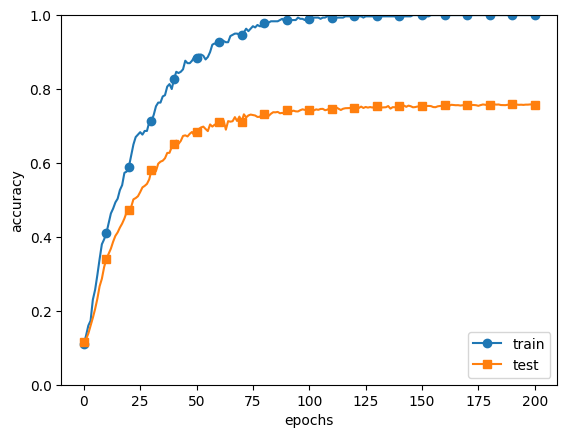

In [51]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習のためデータ数を300にする
x_train = x_train[:300]
t_train = t_train[:300]


# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)


max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0


for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break
            
            
# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## dropout

In [15]:
import matplotlib.pyplot as plt

In [ ]:
Class Dropout:
    def __init__(self,dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
        def forward(self, x, train_flg=True):
            
            # 学習時 ＝>　dropout, 推論時 => 消去した割合の乗算
            if train_flg:  
                self.mask = np.random.rand(*x.shape) > self.dropout_ratio
                return x * self.mask
            
            else:
                return x * (1.0 - self.dropout_ratio)
        
        
        def backward(self, dout):
            return dout * self.mask

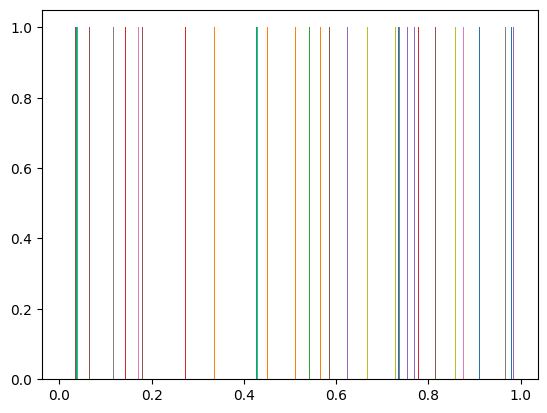

In [27]:
#　一様分布の検証

a = np.random.rand(1, 1000)
a_1 = np.round(a, decimals=1)

_ = plt.hist(a) #　どの確率も同じ　=> drop_out_ratioが0.7なら0.3割のデータが伝播する